In [49]:
import numpy as np
import torch
import ddks
import time
import scipy
import matplotlib.font_manager as fm

from matplotlib import pyplot as plt
from copy import deepcopy

In [28]:
# https://stackoverflow.com/a/15034143
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [14]:
n_samples = 5
n_trails = 5
time_consumption = {}

for n_features in range(1, 15):
    print(f'features: {n_features}')
    dist1 = torch.from_numpy(np.random.random([n_samples, n_features])).to('cuda:0')
    dist2 = torch.from_numpy(np.random.random([n_samples, n_features])).to('cuda:0')

    time_consumption_per_trails_sess = []
    for i in range(n_trails):
        print(f'\tat trail: {i}')

        start_time = time.time()
        calculation = ddks.methods.ddKS()
        calculation(dist1, dist2)
        end_time = time.time()

        time_consumption_per_trails_sess.append(end_time - start_time)
    
    time_consumption.update({
        n_features: deepcopy(time_consumption_per_trails_sess)
    })
    time_consumption_per_trails_sess.clear()


features: 1
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 2
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 3
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 4
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 5
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 6
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 7
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 8
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 9
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 10
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 11
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 12
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trail: 4
features: 13
	at trail: 0
	at trail: 1
	at trail: 2
	at trail: 3
	at trai

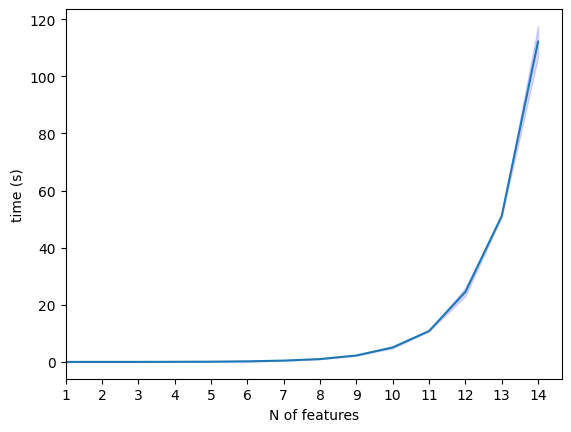

In [54]:
n_features_lst = list(time_consumption.keys())
mean_lst = []
lower_lst = []
upper_lst = []

ax = plt.figure().add_subplot(1, 1, 1)
font = fm.FontProperties(fname='c:\\windows\\fonts\\simsun.ttc')

for time_lst in time_consumption.values():
    mean, lower, upper = mean_confidence_interval(time_lst)
    mean_lst.append(mean)
    lower_lst.append(lower)
    upper_lst.append(upper)

ax.plot(n_features_lst, mean_lst)
ax.fill_between(n_features_lst, lower_lst, upper_lst, color='b', alpha=.15)
ax.set_xlim(xmin=1)
ax.set_xticks(range(1, n_features_lst[-1] + 1))\

ax.set_ylabel('time (s)')
ax.set_xlabel('N of features')

plt.show()